In [2]:
%matplotlib inline


# Following the Metal to Mott insulator Transition


Sequence of plots showing the transfer of spectral weight for a Hubbard
Model in the Bethe Lattice as the local dopping is increased.



[[0.0018236076084092799
 [0.0052217229804646026
 [0.009706202819068655
 [0.015156742520338039
 [0.021257479759838313
 [0.027891253623231645
 [0.03532101173816084
 [0.04308733019774004
 [0.05125934681385359
 [0.05989299807621053
 [0.06881871810277894
 [0.0779229549593404
 [0.08758205649674963
 [0.09730847414192798
 [0.10723272084911664
 [0.11739264863560799
 [0.1315038471811704
 [0.14276133671975968
 [0.15578355778179231
 [0.16753635363596703
 [0.1782119517576733
 [0.19012510197695776
 [0.20354498021698633
 [0.21668772255351237
 [0.22835214794034808
 [0.2415652717378907
 [0.25592401219713523
 [0.26767130795597954
 [0.2826524315448886
 [0.2951386548440476
 [0.307473369921864
 [0.32328321897838225
 [0.3361913052933113
 [0.35157578830266534
 [0.3664178073014073
 [0.3803690159240769
 [0.3951930163543104
 [0.40981314268045466
 [0.42499113296013624
 [0.4400317855826017
 [0.45491186851873106
 [0.46949289453715465
 [0.4861966675950503
 [0.501525973446321
 [0.5174095761313692
 [0.533471697894632

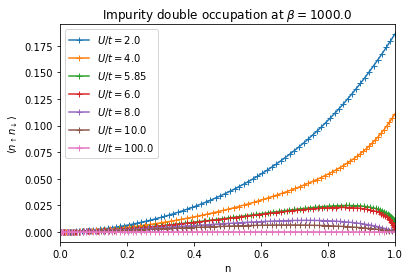

In [7]:
# Code source: Óscar Nájera
# License: BSD 3 clause

from __future__ import division, absolute_import, print_function
import matplotlib.pyplot as plt
import numpy as np
from dmft.twosite_dop import dmft_loop_dop


def plot_d(axis='real', beta=1e3, u_int=np.array([2., 4., 5.85, 6., 8., 10., 100.])):
    fig = plt.figure()
    for u in u_int:
        out_file = axis + '_dop_b{}_U{}'.format(beta, u)
        try:
            res = np.load(out_file + '.npy', allow_pickle=True)
        except IOError:
            res = dmft_loop_dop(u)
            np.save(out_file, res)

        d = [sim.double_ocupation() for sim in res[:, 1]]
        plt.plot(res[:, 0], d, '+-', label='$U/t= {}$'.format(u))

    plt.legend(loc=0)
    plt.title('Impurity double occupation at $\\beta={}$'.format(beta))
    plt.ylabel('$\\langle n_\\uparrow n_\\downarrow \\rangle$')
    plt.xlabel('n')
    plt.xlim([0, 1])
    fig.savefig(out_file + '_b.png', format='png',
                transparent=False, bbox_inches='tight', pad_inches=0.05)
plot_d()

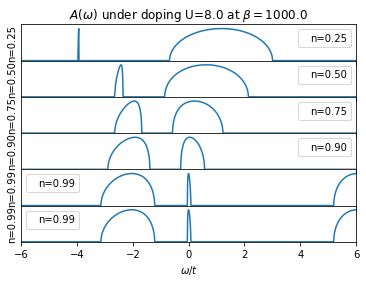

In [16]:
# Code source: Óscar Nájera
# License: BSD 3 clause

from __future__ import division, absolute_import, print_function
import matplotlib.pyplot as plt
import numpy as np
from slaveparticles.quantum import dos
import pickle

axis = 'real'
u = 8.0
beta = 1e3
dop = [0.25, 0.5, 0.75, 0.9, 0.99,1.1]
out_file = axis+'_dop_b{}_U{}'.format(beta, u)
res = np.load(out_file+'.npy', allow_pickle = True)  #아웃 파일이 일단 있어야됨. 어디서 만들지?

f, axes = plt.subplots(len(dop), sharex=True)
axes[0].set_title(r'$A(\omega)$ under doping U={} at '
                  '$\\beta=${}'.format(u, beta))
axes[-1].set_xlabel('$\\omega / t$')
f.subplots_adjust(hspace=0)

for ax, n in zip(axes, dop):
    ind = np.abs(res[:, 0] - n).argmin()
    sim = res[ind, 1]

    w = sim.omega
    s = sim.GF[r'$\Sigma$']
    ra = w + sim.mu - s
    rho = dos.bethe_lattice(ra, sim.t)

    ax.plot(w, rho,
            label='n={:.2f}'.format(sim.ocupations().sum()))
    ax.set_xlim([-6, 6])
    ax.set_ylim([0, 0.36])
    ax.set_yticks([])
    ax.set_ylabel('n={:.2f}'.format(sim.ocupations().sum()))
    ax.legend(loc=0, handlelength=0)

In [24]:
# plt.plot(res[:, -1])
res[:,1]

array([<dmft.twosite_dop.TwoSite_Real_Dop object at 0x7faa6ea76cf8>,
      dtype=object)

In [10]:
3/2 if 1==1 else 1

1.5